In [21]:
import os
import pandas as pd
from datetime import datetime

In [22]:
df = pd.read_csv(os.listdir()[2])
df = df.iloc[:,1:].copy()

In [23]:
df.describe()

,spot_price,theta,rho,kappa,eta,v0,relative_error
count,1085.000000,1.085000e+03,1085.000000,1.085000e+03,1.085000e+03,1.085000e+03,1.085000e+03
mean,356.516686,3.558142e+00,-0.423972,1.542738e+02,1.665048e+02,1.377604e+00,1.015098e+09
std,91.255345,4.362392e+01,0.312906,1.288140e+03,1.340239e+03,1.542348e+01,3.171160e+10
min,127.260000,2.604705e-13,-1.000000,8.772929e-09,9.425137e-09,5.284508e-11,3.172878e-03
25%,290.380000,6.828819e-02,-0.627054,7.000262e-01,1.640751e+00,1.138239e-02,5.355043e-02
50%,366.305000,1.126042e-01,-0.412683,3.043634e+00,2.906695e+00,3.214894e-02,8.294053e-02
75%,424.150000,1.953724e-01,-0.233808,7.549190e+00,5.448599e+00,6.780255e-02,1.348165e-01
max,562.233550,1.418040e+03,0.999909,2.407491e+04,2.761155e+04,3.966430e+02,1.042981e+12


In [24]:
df['calculation_date'] = pd.to_datetime(df['calculation_date'],format="%Y-%m-%d")
df.dtypes

spot_price                 float64
calculation_date    datetime64[ns]
theta                      float64
rho                        float64
kappa                      float64
eta                        float64
v0                         float64
relative_error             float64
w                           object
dtype: object

In [25]:
big = df[((df['relative_error']>=0.2)&(df['relative_error']<1))].copy()
abberrations = df[df['relative_error']>1].copy()
df = df[df['relative_error']<0.2].reset_index(drop=True)
df = df[df['calculation_date']>=datetime(2018,1,1)].copy()

In [26]:
df.describe()

,spot_price,calculation_date,theta,rho,kappa,eta,v0,relative_error
count,864.000000,864,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000
mean,366.630224,2021-02-11 13:40:00,3.996234,-0.347164,192.113537,208.569355,1.722922e+00,0.078900
min,223.970000,2018-01-02 00:00:00,0.027844,-1.000000,0.001408,0.212104,5.284508e-11,0.003173
25%,292.346250,2019-08-21 18:00:00,0.075252,-0.515726,1.034264,2.052025,1.644260e-02,0.051086
50%,367.479975,2021-01-06 00:00:00,0.117436,-0.363181,3.359136,3.257176,3.787570e-02,0.074636
75%,420.983750,2022-07-18 06:00:00,0.202374,-0.208822,8.245756,6.142003,7.474608e-02,0.101269
max,562.233550,2024-07-18 00:00:00,1418.040007,0.706310,24074.913659,27611.547049,3.966430e+02,0.198839
std,76.484264,NaN,48.624810,0.267258,1441.211006,1499.175971,1.726891e+01,0.039791


In [33]:
df['w'].unique().tolist()

['put']

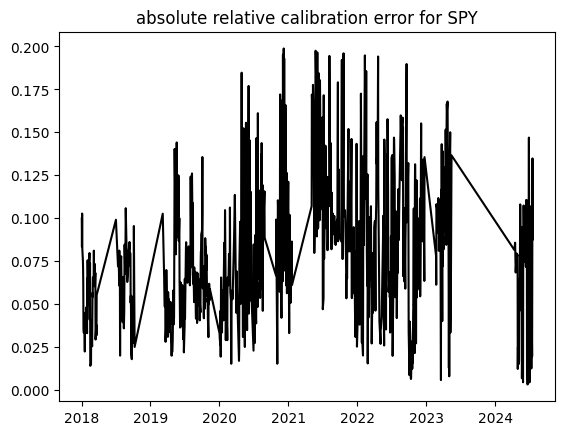

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df.set_index('calculation_date')['relative_error'],color='black')
plt.title('absolute relative calibration error for SPY')
plt.show()
plt.clf()

In [28]:
pd.set_option("display.max_rows",None)
big.sort_values(by='relative_error',ascending=False).reset_index(drop=True)

,spot_price,calculation_date,theta,rho,kappa,eta,v0,relative_error,w
0,260.00000,2020-03-13,0.246864,-1.000000,3.570067,0.372117,3.884530e-02,0.974200,put
1,278.33500,2020-04-09,0.186788,-1.000000,2.468949,0.430887,2.544739e-02,0.959930,put
2,416.14500,2022-05-03,0.062087,-0.993832,6.237274,0.599879,4.835765e-03,0.939014,put
3,288.45500,2020-05-07,0.127917,-0.965245,16.431745,3.085682,7.026220e-02,0.937897,put
4,457.56000,2021-10-29,0.043580,-0.973226,12.618885,1.358839,7.298610e-03,0.922323,put
5,398.00000,2022-05-11,0.086381,-1.000000,5.316642,0.557283,4.210726e-03,0.836014,put
6,424.12000,2022-08-12,0.323352,-0.480712,0.536783,1.623354,3.281183e-02,0.765843,put
7,275.03000,2020-04-21,0.215526,-1.000000,2.881668,0.502137,1.448536e-02,0.723410,put
8,257.58500,2020-04-06,0.212898,-1.000000,2.959488,0.431525,3.140281e-02,0.722636,put
9,302.90500,2020-06-26,0.081914,-1.000000,5.566862,0.566012,4.116812e-03,0.690520,put


In [29]:
pd.set_option("display.max_rows",None)
abberrations.sort_values(by='relative_error',ascending=False).reset_index(drop=True)

,spot_price,calculation_date,theta,rho,kappa,eta,v0,relative_error,w
0,475.85000,2022-01-03,2.150864e-02,-0.957859,1.046062e+01,5.343658e-01,5.081759e-03,1.042981e+12,put
1,427.98000,2021-06-30,5.246662e-02,-0.981606,2.061790e+01,4.256905e+00,3.462009e-05,5.837197e+10,put
2,247.13000,2020-03-16,3.484380e-03,-0.795548,7.823962e-01,4.022875e-01,1.539390e-02,7.568708e+06,put
3,430.16000,2021-10-04,2.501402e-01,-0.996911,4.316167e-03,1.153352e+00,5.638424e-02,6.796371e+06,put
4,140.48000,2012-03-28,3.640509e-05,-0.842884,5.339802e-01,3.046248e-01,1.021928e-02,4.385507e+06,put
5,353.98910,2020-11-12,2.003697e+00,-0.999444,3.558970e-03,1.126263e+00,7.395244e-02,2.354497e+06,put
6,379.61500,2021-01-14,1.490900e+00,-0.998051,4.022431e-02,1.169935e+00,6.341573e-02,2.270439e+06,put
7,306.30500,2020-06-24,6.869397e-02,-0.948931,3.714194e+00,3.921571e-01,4.076538e-03,1.970534e+06,put
8,423.28000,2021-06-23,1.692057e-02,-0.982304,2.796282e+00,1.148336e+00,1.005878e-02,1.217927e+06,put
9,356.31000,2020-11-11,1.115667e+00,-0.999980,5.674161e-02,1.021237e+00,5.991008e-02,7.934077e+05,put
